# Importing all libraries 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')
data_sample=pd.read_csv('sample_submission.csv')

# Data Overview

In [3]:
data_train.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [4]:
data_test.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [5]:
data_sample.head(5)

,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

# Checking if any value is NaN

In [8]:
data_train.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [9]:
data_test.isnull().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [10]:
data_train['data_train'] = 1
data_test['data_train'] = 0
data = pd.concat([data_train, data_test], ignore_index=True)
data.sample(10)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,data_train
32598,87435,03APR2014,SCH,F,47,N,N,0,0,-1.786066,0,50,2,3,30000,1,3,N,0.0,1
38596,25114,31JAN2014,GRD,M,30,N,N,0,0,-2.529695,4,70,1,1,35000,4,3,N,0.0,1
77447,20210,27JAN2014,SCH,M,36,Y,N,0,0,-1.958808,4,50,2,3,17000,4,1,N,NaN,0
11441,76924,24MAR2014,GRD,M,53,N,N,0,0,-1.611063,2,40,2,3,15000,1,2,N,0.0,1
86127,109989,30APR2014,GRD,M,41,N,N,0,0,-1.058765,0,80,2,3,30000,4,1,N,NaN,0
26427,85408,02APR2014,UGR,M,30,Y,Y,0,0,-1.826555,0,40,1,3,65000,2,3,N,0.0,1
74068,43590,20FEB2014,SCH,M,38,N,N,0,0,-1.453123,0,60,2,3,40000,1,3,N,NaN,0
12448,6927,14JAN2014,GRD,F,33,N,N,0,0,-1.974308,0,70,1,2,100000,2,2,N,0.0,1
57454,45892,22FEB2014,SCH,M,48,Y,Y,0,0,-1.593474,0,60,1,3,500000,1,4,Y,0.0,1
73221,27664,03FEB2014,GRD,F,25,Y,N,1,0,-2.024100,6,60,1,2,35000,4,1,N,0.0,1


In [11]:
data.isnull().sum()

client_id               0
app_date                0
education             478
sex                     0
age                     0
car                     0
car_type                0
decline_app_cnt         0
good_work               0
score_bki               0
bki_request_cnt         0
region_rating           0
home_address            0
work_address            0
income                  0
sna                     0
first_time              0
foreign_passport        0
default             36349
data_train              0
dtype: int64

In general , the data is filled completely . There are NaN values only in one column 'education',it will be filled later . As we can see the 'default' column was shown because the test dataset does not include this value, it needs to be predicted.

# Replacing NaN values

<AxesSubplot:>

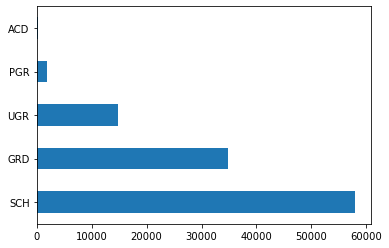

In [12]:
data['education'].value_counts().plot.barh()

In [13]:
data["education"].fillna("SCH", inplace = True)

In [14]:
data.isnull().sum()

client_id               0
app_date                0
education               0
sex                     0
age                     0
car                     0
car_type                0
decline_app_cnt         0
good_work               0
score_bki               0
bki_request_cnt         0
region_rating           0
home_address            0
work_address            0
income                  0
sna                     0
first_time              0
foreign_passport        0
default             36349
data_train              0
dtype: int64

# Сategorical Representation

In [15]:
data.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default', 'data_train'],
      dtype='object')

In [16]:
#numerical representation
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt',
            'income', 'score_bki', 'region_rating']

In [17]:
#categorical representation
cat_cols = ['education', 'work_address', 'home_address', 'sna', 'first_time','month']

In [18]:
#binary representation
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

# Numerical Data Visualisation 

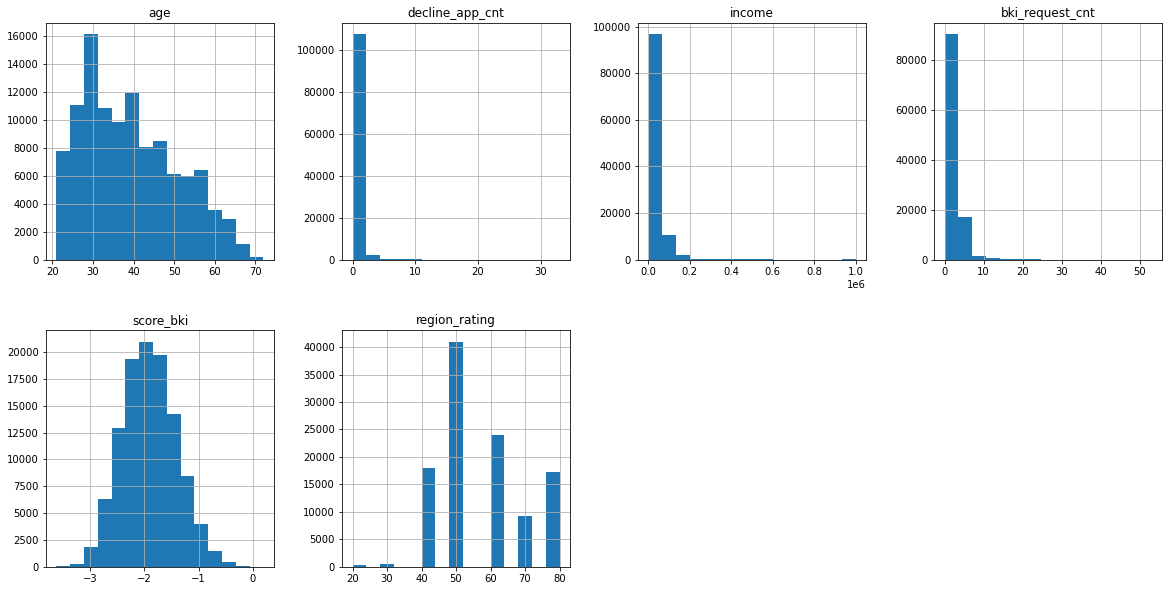

In [19]:
data[['age','decline_app_cnt','income','bki_request_cnt','score_bki','region_rating']].hist(bins=15, figsize=(20, 10), layout=(2, 4));

Some numerical features have a strong right tail, we are going to logarithm them.

The column 'score_bki' already looks like a normal distribution.

# Evaluating Correlations

<AxesSubplot:>

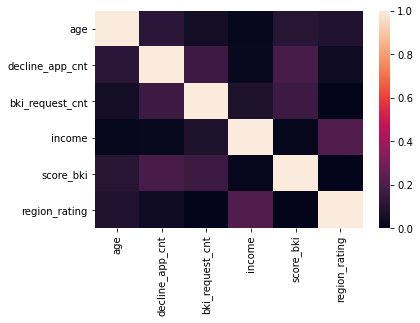

In [20]:
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

Weak correlation can be seen, its good for the linear model.

# Categorical representation

In [21]:
# for binary representation we are using the LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    
# lets check  
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,data_train
0,25905,01FEB2014,SCH,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0.0,1
1,63161,12MAR2014,SCH,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0.0,1
2,25887,01FEB2014,SCH,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0.0,1
3,16222,23JAN2014,SCH,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0.0,1
4,101655,18APR2014,GRD,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0.0,1


In [22]:
#lets transform 'education ' to numeric type
data[['education']].value_counts()

education
SCH          58476
GRD          34768
UGR          14748
PGR           1865
ACD            291
dtype: int64

In [23]:
label_encoder = LabelEncoder()

for column in bin_cols:
    data['education'] = label_encoder.fit_transform(data['education'])

In [24]:
data.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,data_train
0,25905,01FEB2014,3,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0.0,1
1,63161,12MAR2014,3,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0.0,1
2,25887,01FEB2014,3,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0.0,1
3,16222,23JAN2014,3,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0.0,1
4,101655,18APR2014,1,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0.0,1


# Converting 'app_date' Column

In [25]:
#Year
data['app_date'] = pd.to_datetime(data['app_date'])
display(data['app_date'].dt.year.value_counts())

2014    110148
Name: app_date, dtype: int64

In [26]:
#Month
display(data['app_date'].dt.month.value_counts())

3    31597
2    27097
4    26266
1    25188
Name: app_date, dtype: int64

Only four months are included in the data set.

# Adding features

In [27]:
# lets add a new column "month"
data['month'] = data['app_date'].dt.month

In [28]:
#lets convert 'decline_app_cnt' column to categorical representation
data['decline_app_cnt'].value_counts()

0     91471
1     12500
2      3622
3      1365
4       606
5       255
6       156
7        58
8        37
9        29
10       16
11       10
12        5
13        4
14        3
16        3
30        1
15        1
19        1
20        1
21        1
22        1
24        1
33        1
Name: decline_app_cnt, dtype: int64

In [29]:
data['decline_app_cnt'] = data['decline_app_cnt'].apply(
    lambda x: x if x < 4 else 4)
num_cols.remove('decline_app_cnt')
cat_cols.append('decline_app_cnt')

# Checking another columns to upgrade our model

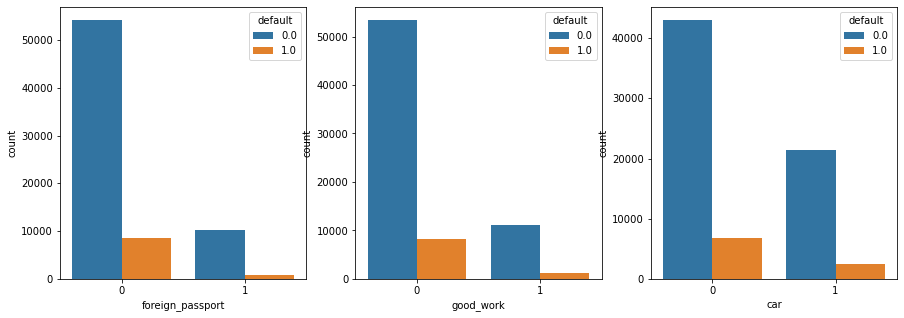

In [30]:
wealthy_features = ['foreign_passport', 'good_work', 'car']

a, b, c = 1, 3, 1
fig = plt.figure(figsize=(15, 5))
for col in wealthy_features:
    plt.subplot(a, b, c)
    plt.xlabel(col)
    sns.countplot(data=data, hue='default', x=col)
    c = c + 1

plt.show()

As we can see , these columns have strong impact onthe target variable.

In [31]:
#lets combine them
data['decent_customer_rate'] = (
    data['foreign_passport'] + 1) * (data['good_work'] + 1) * (data['car'] + 1)
cat_cols.append('decent_customer_rate')

# Log-normal Distribution

In [32]:
i = ['age', 'bki_request_cnt', 'income']

for col in i :
    data[col] = np.log(data[col] + 1)


for col in i:
    data[col] = np.log(data[col] + 1)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2, include_bias=False)
poly_data = pf.fit_transform(data[num_cols])[:, len(num_cols):]
poly_cols = pf.get_feature_names()[len(num_cols):]
poly_df = pd.DataFrame(poly_data, columns=poly_cols)
data = data.join(poly_df, how='left')

# Splitting the Data

In [34]:
train = data.query('data_train == 1').drop(['data_train'], axis=1)
test = data.query('data_train == 0').drop(['data_train'], axis=1)

# Feature Importance 

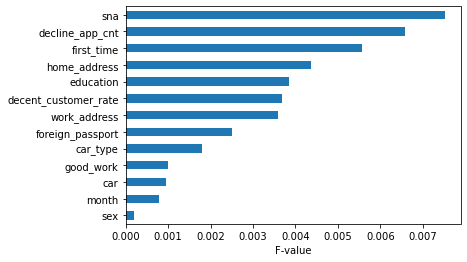

In [35]:
#lets build F-values for categorical and binary representations
imp_cat = Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')
plt.xlabel('F-value')
plt.show()

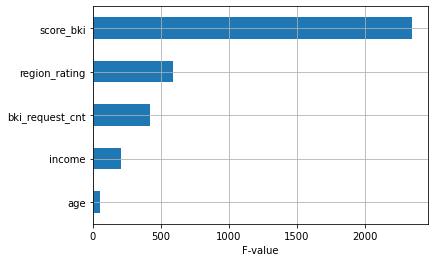

In [36]:
# lets build the same for numerical representation
imp_num = Series(f_classif(train[num_cols], train['default'])[0],
                 index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh', grid=True)
plt.xlabel('F-value')
plt.show()

<AxesSubplot:>

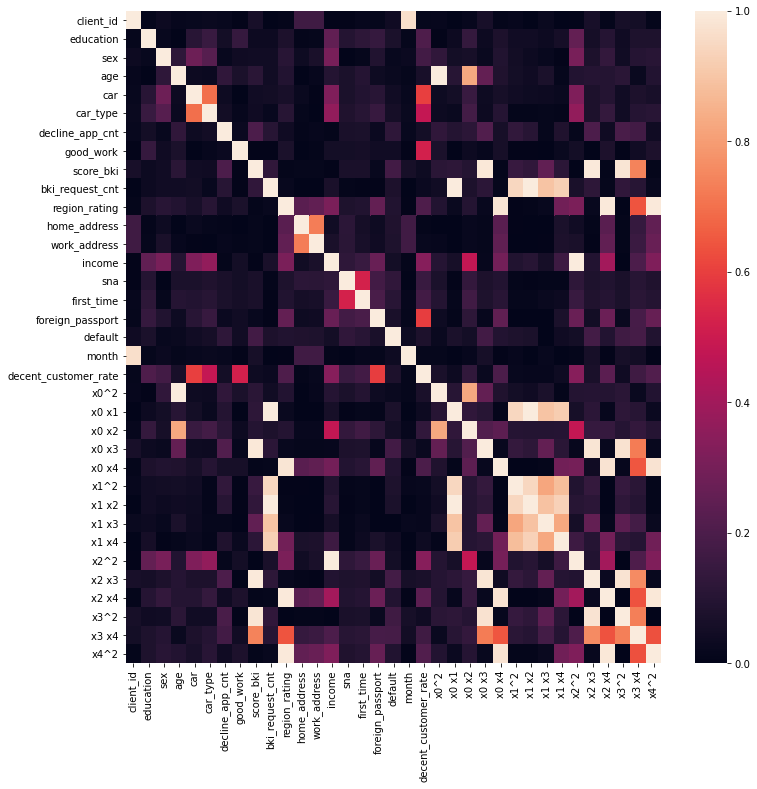

In [37]:
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr().abs(), vmin=0, vmax=1)

# Building Model

In [38]:
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)

In [39]:
X_cat.shape

(73799, 32)

In [40]:
Y_cat = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)

In [41]:
Y_cat.shape

(36349, 32)

# Standardizing Numeric Attributes

In [42]:
X_num = StandardScaler().fit_transform(train[num_cols].values)
X_num

array([[ 1.65533216, -0.09524766, -0.77798224, -0.2087987 , -0.51515718],
       [ 1.4999249 ,  0.81111707, -0.6963564 ,  0.74754461, -0.51515718],
       [-1.4235564 , -0.09524766, -0.02257578,  0.99669566,  1.78270228],
       ...,
       [-0.64728574,  1.04723006,  0.55312826,  0.78696739,  1.78270228],
       [-0.88463179,  0.81111707, -1.27807247,  0.85380611, -0.51515718],
       [-0.32335567,  0.47180311, -0.28820487,  0.28102087, -0.51515718]])

In [43]:
Y_num = StandardScaler().fit_transform(test[num_cols].values)
Y_num

array([[-0.87639712,  0.80739222,  0.70236174, -0.73288746, -0.51984533],
       [ 0.15606297,  0.46857465, -2.85246466,  0.79551047, -0.51984533],
       [ 0.97978082, -0.09764656, -0.02250624,  0.42413578, -0.51984533],
       ...,
       [-0.63902145, -0.09764656,  0.95351663,  1.92005304, -0.51984533],
       [-1.13403681,  0.46857465, -0.02250624,  1.31888606,  1.77259941],
       [ 0.06777833,  0.46857465, -1.06025513,  0.79042787, -0.51984533]])

In [44]:
X = np.hstack([X_num, train[bin_cols].values, train[poly_cols].values, X_cat])
Y = train['default'].values
id_test = test['client_id']

# Dividing data into training and validation sets

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.20, random_state=42)

# Finding the best hyperparameters for models

In [46]:
from sklearn.model_selection import GridSearchCV


penalty = ['l1', 'l2']


C = np.logspace(0, 4, 10)

hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)


clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('The best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('The best C:', best_model.best_estimator_.get_params()['C'])

/Users/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anaconda3/lib/python3.8/site-packages/sklea

The best Penalty: l2
The best C: 7.742636826811269


/Users/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
#The best Penalty: l2
#The best C: 7.742636826811269

In [48]:
model = LogisticRegression(
    C=7.742636826811269,
    class_weight='balanced',
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    multi_class='auto',
    n_jobs=None,
    penalty='l2',
    solver='liblinear',
    verbose=0,
    max_iter=2000)

model.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

In [49]:
Y_predict = model.predict(X_valid)
probs = model.predict_proba(X_valid)[:, 1]

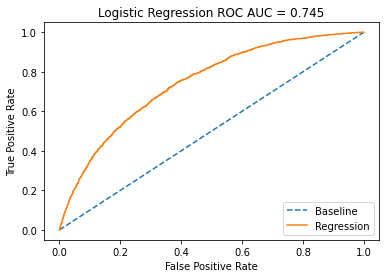

In [50]:
fpr, tpr, threshold = roc_curve(y_valid, probs)
roc_auc = roc_auc_score(y_valid, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

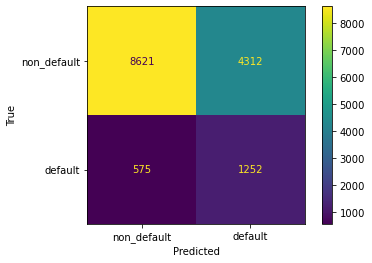

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid, Y_predict)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default','default'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

# Kaggle Submission

In [61]:
X_cat_test = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)
X_num_test = StandardScaler().fit_transform(test[num_cols].values)
X_test = np.hstack([X_num_test, test[bin_cols].values, test[poly_cols].values, X_cat_test])

y_probs = model.predict_proba(X_test)[:,1]

test['default'] = y_probs
submission = test[['client_id','default']]
display(submission.sample(10))
display(submission.shape)

submission.to_csv('submission.csv', index=False)

,client_id,default
95331,5844,0.682444
92819,28424,0.501988
83892,25764,0.510525
77670,72063,0.580272
109729,44837,0.497444
93401,87769,0.458265
88084,53702,0.311604
91150,52578,0.857248
100166,58433,0.161724
98312,86791,0.159727


(36349, 2)